# Assignment #4. Rod Cutting

Given a rod of length 𝑛 inches and a table of prices 𝑝𝑖 for 𝑖 = 1, 2, … , 𝑛, the rod-cutting problem determines the maximum revenue 𝑟𝑛 obtainable by cutting up the rod and selling the pieces. Note that if the price  𝑝𝑛 for a rod of length 𝑛 is large enough, an optimal solution may require no cutting at all.

Consider the case when 𝑛 = 4. Figure 1 shows all the ways to cut up a rod of 4 inches in length, including the way with no cuts at all. We see that cutting a 4-inch rod into two 2-inch pieces (c) produces revenue  𝑝2 + 𝑝2 = 5 + 5 = 10, which is optimal.

## 1. Brute-force top down recursive approach

In [38]:
def cutRod(p, n):
    print('call', n)
    if n == 0:  # base case
        return 0
    q = float("-inf")
    for i in range(1, n+1):
        q = max(q, p[i]+cutRod(p,n-i))
    return q
    
price = [ 1, 5, 8, 9, 10, 17, 17, 20 ]
print(cutRod(price, 5))

call 5
call 4
call 3
call 2
call 1
call 0
call 0
call 1
call 0
call 0
call 2
call 1
call 0
call 0
call 1
call 0
call 0
call 3
call 2
call 1
call 0
call 0
call 1
call 0
call 0
call 2
call 1
call 0
call 0
call 1
call 0
call 0
25


## 2. Dynamic programming top down 

In [37]:
def dpCutRod(p, n):
    r = [ float("-inf") for _ in range(n+1)]    
    return memoCutRod(p,n,r)

def memoCutRod(p, n, r):
    print('call', n, end='/')
    print(r)
    
    if r[n] >= 0: 
        return r[n]
    if n == 0: q = 0
    else: 
        q = float("-inf")
        for i in range(1, n+1):
            q = max(q, p[i]+memoCutRod(p, n-i, r))    
    r[n] = q
    return q

price = [ 1, 5, 8, 9, 10, 17, 17, 20 ]
print(dpCutRod(price, 5))

call 5/[-inf, -inf, -inf, -inf, -inf, -inf]
call 4/[-inf, -inf, -inf, -inf, -inf, -inf]
call 3/[-inf, -inf, -inf, -inf, -inf, -inf]
call 2/[-inf, -inf, -inf, -inf, -inf, -inf]
call 1/[-inf, -inf, -inf, -inf, -inf, -inf]
call 0/[-inf, -inf, -inf, -inf, -inf, -inf]
call 0/[0, 5, -inf, -inf, -inf, -inf]
call 1/[0, 5, 10, -inf, -inf, -inf]
call 0/[0, 5, 10, -inf, -inf, -inf]
call 2/[0, 5, 10, 15, -inf, -inf]
call 1/[0, 5, 10, 15, -inf, -inf]
call 0/[0, 5, 10, 15, -inf, -inf]
call 3/[0, 5, 10, 15, 20, -inf]
call 2/[0, 5, 10, 15, 20, -inf]
call 1/[0, 5, 10, 15, 20, -inf]
call 0/[0, 5, 10, 15, 20, -inf]
25


## 3. Execution Time Comparison

measure the execution time for n =5, 10, 15, 20, 25, 30 for each. compare the two code by plotting execution times on a graph

In [36]:
import random
import time

random.seed(42) # set seed
price = [ random.randint(1,30) for _ in range(31)]

# Measure execution times 
n_values = [5, 10, 15, 20, 25, 30]
times_cutRod = []
times_dpCutRod = []
results_cutRod = []
results_dpCutRod = []

for n in n_values:
    # brute force
    start_time = time.time()
    results_cutRod.append(cutRod(price, n))
    end_time = time.time()
    times_cutRod.append(end_time - start_time)
    
    # dynamic programming - memoization
    start_time = time.time()
    results_dpCutRod.append(dpCutRod(price, n))
    end_time = time.time()
    times_dpCutRod.append(end_time - start_time)
    
# Print out the results
print(f'{"n":>5} | {"cutRod time":>10}| {"cutRod Result":>15} | {"dpCutRod time":>10} | {"dpCutRod Result":>15}')  # header
for i, n in enumerate(n_values):
    print(f'{n:>5} | {times_cutRod[i]:>10.6f}| {results_cutRod[i]:>15} | {times_dpCutRod[i]:>10.6f} | {results_dpCutRod[i]:>15}')

    n | cutRod time|   cutRod Result | dpCutRod time | dpCutRod Result
    5 |   0.000000|              32 |   0.000000 |              32
   10 |   0.000000|              76 |   0.000807 |              76
   15 |   0.015642|             120 |   0.000000 |             120
   20 |   0.468516|             152 |   0.000000 |             152
   25 |  15.290212|             196 |   0.000000 |             196
   30 | 478.750946|             240 |   0.000000 |             240


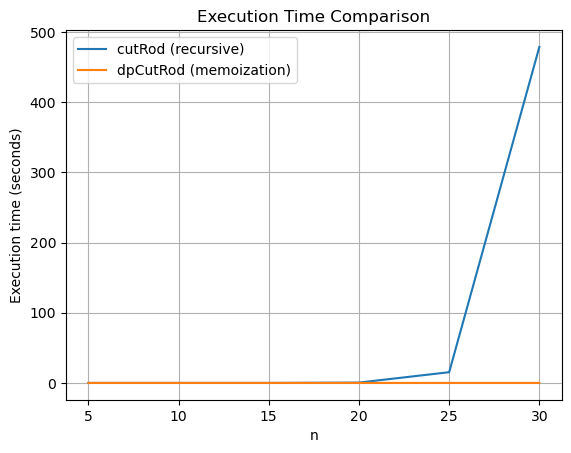

In [39]:
import matplotlib.pyplot as plt

# Plotting the results
plt.plot(n_values, times_cutRod, label='cutRod (recursive)')
plt.plot(n_values, times_dpCutRod, label='dpCutRod (memoization)')
plt.xlabel('n')
plt.ylabel('Execution time (seconds)')
plt.title('Execution Time Comparison')
plt.legend()
plt.grid(True)
plt.show()